<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_add_delta_(0__1)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0-1'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20-1.csv',
 'data_add_delta_0_n30-1.csv',
 'data_add_delta_0_n60-1.csv',
 'data_add_delta_0_n120-1.csv',
 'data_add_delta_0_n250-1.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n30-1.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.624350,128.566891,127.889027,0.677864
1,0.0,1.0,47.067808,95.047509,91.779690,-1.354352,242.540656,244.456288,-1.915633
2,0.0,2.0,99.291665,61.179446,95.992578,-0.051627,266.412063,266.848566,-0.436503
3,0.0,3.0,36.059748,81.961304,62.806562,0.315474,191.143088,191.147887,-0.004799
4,0.0,4.0,22.561835,57.403703,99.891733,-0.826040,189.031231,190.374202,-1.342971
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.753276,120.805563,120.318910,0.486653
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.081346,230.812122,230.818038,-0.005916
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.357472,203.239934,203.318453,-0.078519
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.217012,116.064088,116.693065,-0.628977


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.624350,128.566891,127.889027,0.677864
1,0.0,1.0,47.067808,95.047509,91.779690,-1.354352,242.540656,244.456288,-1.915633
2,0.0,2.0,99.291665,61.179446,95.992578,-0.051627,266.412063,266.848566,-0.436503
3,0.0,3.0,36.059748,81.961304,62.806562,0.315474,191.143088,191.147887,-0.004799
4,0.0,4.0,22.561835,57.403703,99.891733,-0.826040,189.031231,190.374202,-1.342971
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.753276,120.805563,120.318910,0.486653
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.081346,230.812122,230.818038,-0.005916
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.357472,203.239934,203.318453,-0.078519
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.217012,116.064088,116.693065,-0.628977


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  37.451801  35.866901  ...  128.566891  127.889027  0.677864
      1.0    47.067808  95.047509  91.779690  ...  242.540656  244.456288 -1.915633
      2.0    99.291665  61.179446  95.992578  ...  266.412063  266.848566 -0.436503
      3.0    36.059748  81.961304  62.806562  ...  191.143088  191.147887 -0.004799
      4.0    22.561835  57.403703  99.891733  ...  189.031231  190.374202 -1.342971
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.165046  31.666469  56.220772  ...  120.805563  120.318910  0.486653
      26.0   93.324773  99.972234  27.596461  ...  230.812122  230.818038 -0.005916
      27.0   28.102838  93.083445  72.411123  ...  203.239934  203.318453 -0.078519
      28.0   30.257867  20.848863  55.174370  ...  116.064088  116.693065 -0.628977
      29.0   90.716789  93.036058  71.241563  ...  266.098902  265.034376  1.064526

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  37.451801  35.866901  ...  128.566891  127.889027  0.677864
      1.0    47.067808  95.047509  91.779690  ...  242.540656  244.456288 -1.915633
      2.0    99.291665  61.179446  95.992578  ...  266.412063  266.848566 -0.436503
      3.0    36.059748  81.961304  62.806562  ...  191.143088  191.147887 -0.004799
      4.0    22.561835  57.403703  99.891733  ...  189.031231  190.374202 -1.342971
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.165046  31.666469  56.220772  ...  120.805563  120.318910  0.486653
      26.0   93.324773  99.972234  27.596461  ...  230.812122  230.818038 -0.005916
      27.0   28.102838  93.083445  72.411123  ...  203.239934  203.318453 -0.078519
      28.0   30.257867  20.848863  55.174370  ...  116.064088  116.693065 -0.628977
      29.0   90.716789  93.036058  71.241563  ...  266.098902  265.034376  1.064526

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,0.624350,128.566891,127.889027,0.677864
1,0.0,1.0,47.067808,95.047509,91.779690,-1.354352,242.540656,244.456288,-1.915633
2,0.0,2.0,99.291665,61.179446,95.992578,-0.051627,266.412063,266.848566,-0.436503
3,0.0,3.0,36.059748,81.961304,62.806562,0.315474,191.143088,191.147887,-0.004799
4,0.0,4.0,22.561835,57.403703,99.891733,-0.826040,189.031231,190.374202,-1.342971
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,0.753276,120.805563,120.318910,0.486653
29996,999.0,26.0,93.324773,99.972234,27.596461,-0.081346,230.812122,230.818038,-0.005916
29997,999.0,27.0,28.102838,93.083445,72.411123,-0.357472,203.239934,203.318453,-0.078519
29998,999.0,28.0,30.257867,20.848863,55.174370,-0.217012,116.064088,116.693065,-0.628977


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    44.623839  37.451801  35.866901  ...  128.566891  127.889027  0.677864
      1.0    47.067808  95.047509  91.779690  ...  242.540656  244.456288 -1.915633
      2.0    99.291665  61.179446  95.992578  ...  266.412063  266.848566 -0.436503
      3.0    36.059748  81.961304  62.806562  ...  191.143088  191.147887 -0.004799
      4.0    22.561835  57.403703  99.891733  ...  189.031231  190.374202 -1.342971
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.165046  31.666469  56.220772  ...  120.805563  120.318910  0.486653
      26.0   93.324773  99.972234  27.596461  ...  230.812122  230.818038 -0.005916
      27.0   28.102838  93.083445  72.411123  ...  203.239934  203.318453 -0.078519
      28.0   30.257867  20.848863  55.174370  ...  116.064088  116.693065 -0.628977
      29.0   90.716789  93.036058  71.241563  ...  266.098902  265.034376  1.064526

[30000 rows x 7 columns]

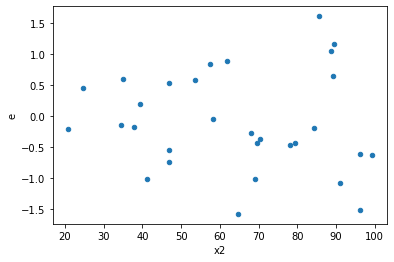

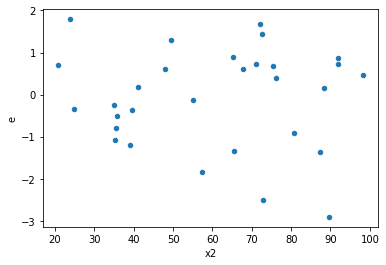

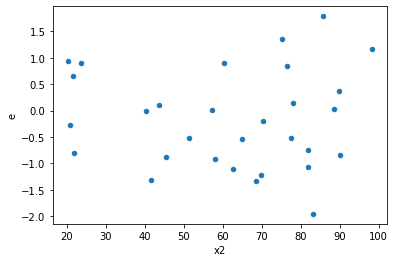

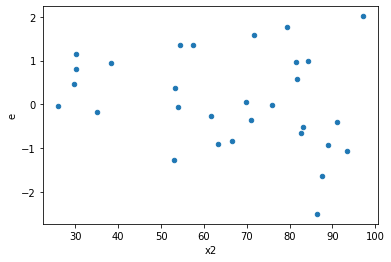

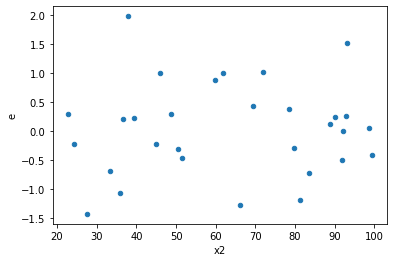

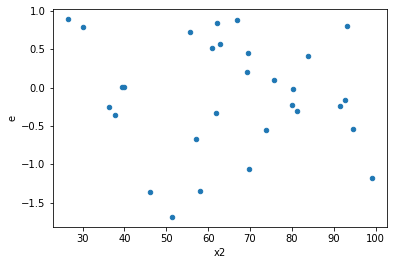

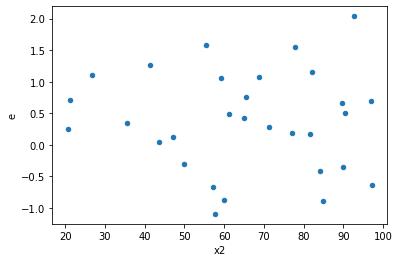

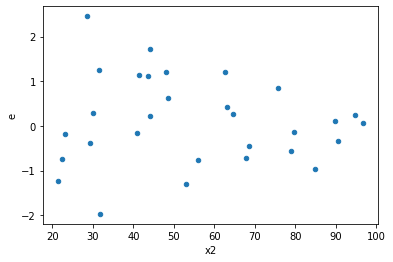

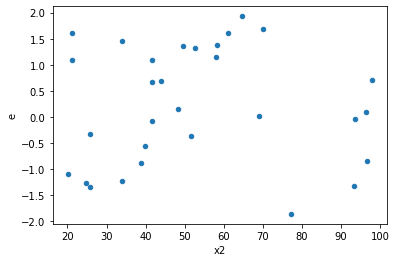

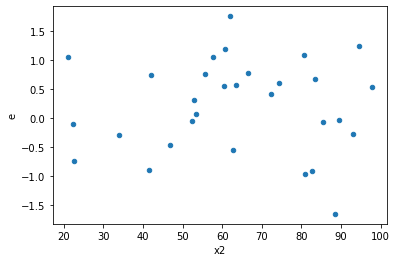

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,9.0,9.0,4.508505193652431,8.257696993864055,0.5009450215169369,0.9175218882071172,1.831582007599802,0.38073570165966486,0.8096321491701676,0.19036785082983243,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,4.345408867786775,9.539107003700144,0.48282320753186386,1.059900778188905,2.19521506351568,0.25708577811000866,0.8714571109449957,0.12854288905500433,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,7.398930272718218,12.213058698594265,0.8221033636353575,1.3570065220660295,1.650651952164895,0.46689595057109434,0.7665520247144528,0.23344797528554717,Reject005=1 : Homoscedasticity
9.0,9.0,9.0,5.776091320494085,6.537690061903601,0.6417879244993427,0.7264100068781779,1.131853653128249,0.856642685142945,0.5716786574285275,0.4283213425714725,Reject005=1 : Homoscedasticity
10.0,9.0,9.0,3.524001832464116,9.600135580048057,0.39155575916267954,1.066681731116451,2.7242141282699843,0.15156351608977436,0.9242182419551128,0.07578175804488718,Reject005=1 : Homoscedasticity
11.0,9.0,9.0,5.684131539861556,22.83074807762417,0.6315701710957284,2.5367497864026856,4.016576308538462,0.05036071018781785,0.9748196449060911,0.025180355093908924,Reject005=1 : Homoscedasticity
12.0,9.0,9.0,4.325672041060328,10.080520159824367,0.4806302267844809,1.1200577955360407,2.330393997542491,0.22353867836358532,0.8882306608182073,0.11176933918179266,Reject005=1 : Homoscedasticity
13.0,9.0,9.0,6.480858870538608,18.798820009159634,0.7200954300598453,2.088757778795515,2.900668010935611,0.12846104379145684,0.9357694781042716,0.06423052189572842,Reject005=1 : Homoscedasticity
16.0,9.0,9.0,3.671094475424016,6.880273785202883,0.40789938615822396,0.7644748650225426,1.8741750808274156,0.3631738135685598,0.8184130932157201,0.1815869067842799,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,12.819894389541954,10.026933349820425,1.424432709949106,1.1141037055356027,0.7821385297838385,0.7202898891690902,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,11.747137936764439,10.006007736264603,1.3052375485293821,1.1117786373627336,0.8517826035692739,0.8150353615278303,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,13.104979958096239,5.475987845346851,1.4561088842329155,0.6084430939274279,0.4178554917944604,0.2097222654592856,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,4.508505193652431,8.257696993864055,0.5009450215169369,0.9175218882071172,1.831582007599802,0.38073570165966486,Reject005=1 : Homoscedasticity
4.0,9.0,9.0,4.345408867786775,9.539107003700144,0.48282320753186386,1.059900778188905,2.19521506351568,0.25708577811000866,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,7.398930272718218,12.213058698594265,0.8221033636353575,1.3570065220660295,1.650651952164895,0.46689595057109434,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,12.134263930814976,6.278981001012173,1.3482515478683306,0.6976645556680192,0.5174587463081872,0.3406002562542488,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,15.603258284534034,5.328622969150897,1.733695364948226,0.5920692187945441,0.3415070667921093,0.12524743962330642,Reject005=1 : Homoscedasticity
8.0,9.0,9.0,11.540712399818096,5.183629955124654,1.2823013777575663,0.5759588839027393,0.4491603096535321,0.24885737224338514,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      948
Reject005=0 : Heteroscedasticity     52
Name: Result_test, dtype: int64